# Librairies

In [47]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import numpy as np

# Load data

In [48]:
gdf = gpd.read_file('raw/Arstrafik.gpkg', layer='Arstrafik')

c:\Users\xbonnema\miniconda3\envs\geodata\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: GPKG: unrecognized user_version=0x00000000 (0) on 'raw/Arstrafik.gpkg'
  return ogr_read(


In [49]:
gdf.columns

Index(['Antal_mätdygn', 'CHANGE_DATE', 'CID', 'CREATE_DATE', 'DIRECTION',
       'Datum_för_slut_av_perioden', 'Datum_för_start_av_perioden',
       'END_POSITION', 'EXTENT_NO', 'EXTENT_TYPE',
       'Eftermiddagsmax_trafikflöde', 'Eftermiddagsmaxtimme',
       'FEATURE_TYPE_OBJECT_ID', 'FEATURE_TYPE_VERSION_ID',
       'Förmiddagsmax_trafikflöde', 'Förmiddagsmaxtimme',
       'Hastighet_85_percentil', 'Hastighet_medel', 'Hastighet_median',
       'MAIN_ATTRIBUTE_DESCRIPTION', 'MAIN_ATTRIBUTE_VALUE',
       'Metod_för_datainsamling', 'Metod_för_årstrafikberäkning', 'Mätplats',
       'NET_ELEMENT_OBJECT_ID', 'Namn', 'OBJECT_ID', 'Riktningsbeskrivning',
       'Riktningsuppdelad', 'START_POSITION', 'Skyltad_hastighet',
       'TRAFFIC_TYPES', 'Trafikflöde_00_01__fordon_dygn__alla_fordon',
       'Trafikflöde_00_01__fordon_dygn__tunga_fordon',
       'Trafikflöde_01_02__fordon_dygn__alla_fordon',
       'Trafikflöde_01_02__fordon_dygn__tunga_fordon',
       'Trafikflöde_02_03__fordon_dyg

In [50]:
# english_col = [
#     'Number_of_measurement_days', 'CHANGE_DATE', 'CID', 'CREATE_DATE', 'DIRECTION',
#     'End_date_of_period', 'Start_date_of_period', 'END_POSITION', 'EXTENT_NO', 'EXTENT_TYPE',
#     'Afternoon_peak_traffic_flow', 'Afternoon_peak_hour', 'FEATURE_TYPE_OBJECT_ID', 'FEATURE_TYPE_VERSION_ID',
#     'Morning_peak_traffic_flow', 'Morning_peak_hour', 'Speed_85th_percentile', 'Speed_average', 'Speed_median',
#     'MAIN_ATTRIBUTE_DESCRIPTION', 'MAIN_ATTRIBUTE_VALUE', 'Data_collection_method', 
#     'Annual_traffic_calculation_method', 'Measurement_site', 'NET_ELEMENT_OBJECT_ID', 'Name', 'OBJECT_ID',
#     'Direction_description', 'Direction_separated', 'START_POSITION', 'Posted_speed_limit',
#     'TRAFFIC_TYPES', 'Traffic_flow_00_01_vehicles_per_day_all_vehicles',
#     'Traffic_flow_00_01_vehicles_per_day_heavy_vehicles', 
#     ##########
    
#     'Traffic_flow_22_23_vehicles_per_day_all_vehicles',
#     'Traffic_flow_22_23_vehicles_per_day_heavy_vehicles',
#     'Traffic_flow_23_24_vehicles_per_day_all_vehicles',
#     'Traffic_flow_23_24_vehicles_per_day_heavy_vehicles',
#     'Traffic_flow_vehicles_per_day_all_vehicles',
#     'Traffic_flow_vehicles_per_day_heavy_vehicles',
#     'Traffic_flow_percentage_heavy_vehicles', 
#     'VALID_FROM', 'VALID_TO',
#     'VERSION_ID', 'fid', 'FEATURE_TYPE_NAME', 'geometry'
# ]


In [51]:
# "Data Collection Method"
gdf['Metod_för_datainsamling'].unique()
# "Measured traffic", "Measured traffic adjusted with index for measurement location"

array(['Uppmätt trafik', 'Uppmätt trafik justerad med index för mätplats'],
      dtype=object)

In [52]:
# We should remove year and AMVD Totalt from the names
def clean(string): 
    return ''.join([i for i in string if not i.isdigit()]).replace('ÅMVD', '').replace('Totalt', '').replace('  ', '')

gdf['Namn'] = gdf.Namn.apply(lambda x : clean(x))

In [53]:
for k in gdf.columns[-20:]:
    print(k, gdf[k].unique().size)

Trafikflöde_19_20__fordon_dygn__tunga_fordon 170
Trafikflöde_20_21__fordon_dygn__alla_fordon 1898
Trafikflöde_20_21__fordon_dygn__tunga_fordon 1
Trafikflöde_21_22__fordon_dygn__alla_fordon 1673
Trafikflöde_21_22__fordon_dygn__tunga_fordon 120
Trafikflöde_22_06__fordon_tidperiod__alla_fordon 3321
Trafikflöde_22_06__fordon_tidperiod__tunga_fordon 1
Trafikflöde_22_23__fordon_dygn__alla_fordon 1391
Trafikflöde_22_23__fordon_dygn__tunga_fordon 99
Trafikflöde_23_24__fordon_dygn__alla_fordon 1051
Trafikflöde_23_24__fordon_dygn__tunga_fordon 78
Trafikflöde__fordon_dygn__alla_fordon 960
Trafikflöde__fordon_dygn__tunga_fordon 474
Trafikflöde_andel_____tunga_fordon 76
VALID_FROM 354
VALID_TO 1
VERSION_ID 1
fid 51909
FEATURE_TYPE_NAME 1
geometry 8906


In [54]:
gdf.TRAFFIC_TYPES.value_counts()

TRAFFIC_TYPES
Bilnät             49502
Cykelnät            2195
Gångnät              195
Bilnät+Cykelnät        1
Name: count, dtype: int64

In [55]:
# Keep only motor vehciles measurement
gdf = gdf[gdf['TRAFFIC_TYPES'] == 'Bilnät']

In [56]:
# Filter relevant information
gdf = gdf[[
    'CHANGE_DATE', 'CID', 'CREATE_DATE', 'DIRECTION',
       'Datum_för_slut_av_perioden', 'Datum_för_start_av_perioden',
    'Hastighet_85_percentil', 'Hastighet_medel', 'Hastighet_median',
     'Riktningsbeskrivning',
       'Riktningsuppdelad', 
    
    'Trafikflöde__fordon_dygn__alla_fordon',
       'Trafikflöde__fordon_dygn__tunga_fordon',
       'Trafikflöde_andel_____tunga_fordon',
       'Namn',
       'geometry'
       
]]


In [57]:
# Translate
gdf.columns = [
    'CHANGE_DATE', 'CID', 'CREATE_DATE', 'DIRECTION',
     'End_date_of_period', 'Start_date_of_period',
     'Speed_85th_percentile', 'Speed_average', 'Speed_median',
     
    'Direction_description', 'Direction_separated', 
    
    'Traffic_flow_vehicles_per_day_all_vehicles',
    'Traffic_flow_vehicles_per_day_heavy_vehicles',
    'Traffic_flow_percentage_heavy_vehicles', 
    'Street_name',
    'geometry'
]

In [58]:
gdf.Direction_separated.value_counts()

Direction_separated
Ja     30869
Nej    18633
Name: count, dtype: int64

In [59]:
# Some roads are both ways, some are oneway
gdf.Direction_description.value_counts()

Direction_description
Totalt                                         18633
Från Infart till Utfart                          318
Från Utfart till Infart                          304
Från Tpl Haga Södra till Tpl Karlberg            244
Från Torsgatan till Solnabroavfarten             162
                                               ...  
Från Furusångsvägen till Abrahamsbergsvägen        1
Från Lingvägen till Lemmings Väg                   1
Från Söndagsvägen till Måndagsvägen                1
Från Nickelgränd till Vändplan                     1
Från Årstaskogs Väg till Sjöviksbacken             1
Name: count, Length: 5833, dtype: int64

(136934.82171231226, 162412.85314067276, 6567235.01494142, 6593578.18900279)

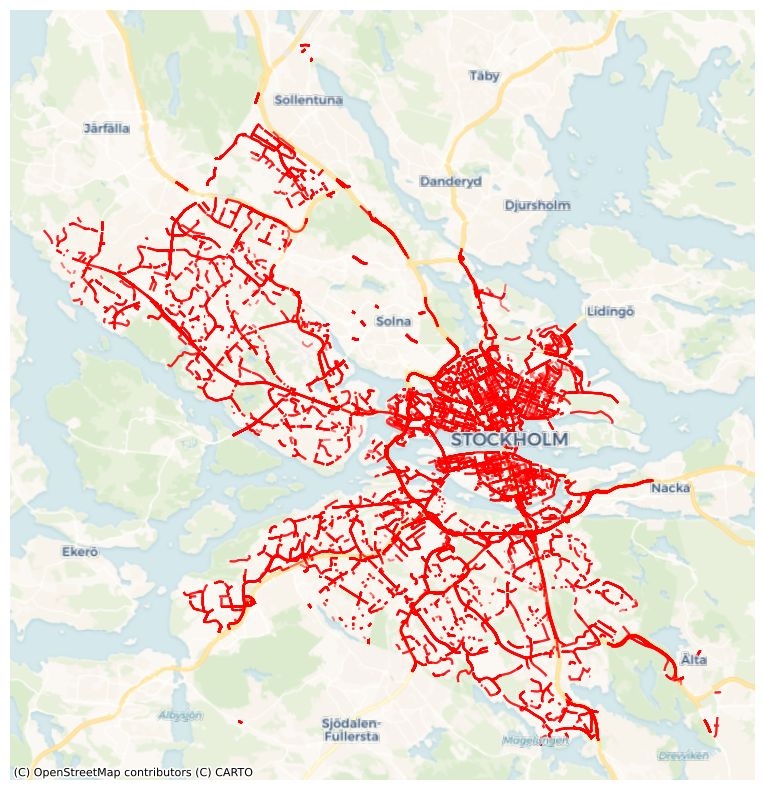

In [60]:
# Plot sensors
import contextily as cx
ax = gdf.plot(color = 'r', markersize = 10, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')

In [61]:
gdf['Start_date_of_period'].unique()

array([20210101, 19940101, 20160101, 19920101, 20150101, 20200101,
       20190101, 20130101, 20060101, 19970101, 20110101, 19950101,
       20220101, 20230101, 20180101, 20170101, 20080101, 20000101,
       19990101, 19930101, 20090101, 20240101, 20120101, 20070101,
       19980101, 20010101, 20040101, 20100101, 20020101, 20140101,
       20030101, 19910101, 19900101, 19960101, 20050101], dtype=int64)

In [62]:
gdf['End_date_of_period'].unique()

array([20211231, 19941231, 20161231, 19921231, 20151231, 20201231,
       20191231, 20131231, 20061231, 19971231, 20111231, 19951231,
       20221231, 20231231, 20181231, 20171231, 20081231, 20001231,
       19991231, 19931231, 20091231, 20241231, 20121231, 20071231,
       19981231, 20011231, 20041231, 20101231, 20021231, 20141231,
       20031231, 19911231, 19901231, 19961231, 20051231], dtype=int64)

In [63]:
# Add CRS
gdf.to_crs('epsg:4326', inplace=True)

In [64]:
gdf.drop(['CHANGE_DATE', 'CID',  'CREATE_DATE',
     'End_date_of_period'], axis = 1, inplace=True)

In [65]:
gdf.columns

Index(['DIRECTION', 'Start_date_of_period', 'Speed_85th_percentile',
       'Speed_average', 'Speed_median', 'Direction_description',
       'Direction_separated', 'Traffic_flow_vehicles_per_day_all_vehicles',
       'Traffic_flow_vehicles_per_day_heavy_vehicles',
       'Traffic_flow_percentage_heavy_vehicles', 'Street_name', 'geometry'],
      dtype='object')

In [66]:
# MAE between average and median is less than 1km/h, let's keep only avg
abs(gdf.Speed_average - gdf.Speed_median).mean()

0.4905773257553096

In [67]:
# Retrieve year 
gdf['year'] = gdf.Start_date_of_period.apply(lambda x : int(str(x)[:4]))

In [69]:
gdf.year.value_counts().sort_index()[-10:]

year
2015    2285
2016    2419
2017    1797
2018    2091
2019    1876
2020    1324
2021    1686
2022    1201
2023    1324
2024    1584
Name: count, dtype: int64

In [71]:
gdf['raw_oneway'] = gdf.Direction_separated.apply(lambda x : True if x == 'Ja' else False)

In [72]:
gdf.rename(columns = {
    'Speed_85th_percentile' : 's85', 
    'Speed_average' : 'savg',
       'Traffic_flow_vehicles_per_day_all_vehicles' : 'AADT',
       'Traffic_flow_vehicles_per_day_heavy_vehicles' : 'TR_AADT',
       'Traffic_flow_percentage_heavy_vehicles' : 'TR_pct_AADT',
        'Direction_description' : 'raw_direction'
}, inplace=True)

# Map Matching OSM

In [73]:
gdf_unique = gdf[gdf.year >=2015].drop_duplicates(subset = ['geometry'])

In [74]:
gdf_unique.shape

(4484, 14)

In [75]:
import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import lines_matching

In [76]:
gdf_unique = lines_matching(gdf_unique)

Main graph loaded
Node 1549759342 not reachable from 447965764
Node 1549759342 not reachable from 482896762
Node 1549759342 not reachable from 447965764
Node 1549759342 not reachable from 447965764
Node 1549759342 not reachable from 534342978
Node 1549759342 not reachable from 482896762
Node 1549759342 not reachable from 447965764
Node 1549759342 not reachable from 447965764
Node 1865724992 not reachable from 1817755971
Node 1865724992 not reachable from 1958135832
Node 1865724992 not reachable from 1916978711
Node 1865724992 not reachable from 1817755971
Node 1865724992 not reachable from 1817755971
Node 2076825837 not reachable from 1817755971
Node 2076825837 not reachable from 1958135832
Node 2076825837 not reachable from 1916978711
Node 2076825837 not reachable from 1741398532
Node 2076825837 not reachable from 1987037568
Node 2076825837 not reachable from 1817755971
Node 2076825837 not reachable from 1865724992
Node 1459138974 not reachable from 1445703130
Node 1435217952 not reac

In [77]:
gdf_unique[['Street_name', 'osm_name']].drop_duplicates().dropna()

Street_name        osm_name
0                                          Polhemsgatan     Polhemsgatan
2                                        Artillerigatan   Artillerigatan
3      Strandvägen Från Artillerigatan till Styrmansg...     Strandvägen
4      Strandvägen Från Styrmansgatan till Artillerig...     Strandvägen
5            Strandvägen Från Storgatan till Ulrikagatan     Strandvägen
...                                                  ...             ...
50920      Spångavägen Från Brommaplan till Vadmalsvägen     Spångavägen
50921      Spångavägen Från Vadmalsvägen till Brommaplan     Spångavägen
50987  Tunnlandsvägen Från Marklandsbacken till Skålp...  Tunnlandsvägen
50989  Tunnlandsvägen Från Skålpundsvägen till Markla...  Tunnlandsvägen
51008  Bergslagsvägen Från flervägskorsning till Råck...  Bergslagsvägen

[3234 rows x 2 columns]

In [78]:
gdf[gdf.year >=2015].shape

(17587, 14)

In [79]:
gdf = gdf[gdf.year >=2015].set_index('geometry').join(
    gdf_unique.set_index('geometry')[[ 'osmid',
       'osm_name', 'osm_lanes', 'osm_type', 'osm_oneway']], 
    how = 'inner'
).reset_index()

In [80]:
gdf = gpd.GeoDataFrame(
    gdf,
    geometry = 'geometry',
    crs = 'epsg:4326'
)

In [83]:
gdf.rename(columns = {'Street_name': 'raw_name'}, inplace=True)

In [86]:
gdf.loc[~gdf.raw_oneway, 'raw_direction'] = np.nan

# Final Saving

In [88]:
# Saving
for year in range(2015, 2025): # gdf.year.unique():
    # Extract corresponding year
    sub = gdf[gdf.year == year]
    print(year, sub.shape[0])
    sub[[
        'AADT', 'TR_AADT', 'TR_pct_AADT', 's85', 'savg', 'geometry', 'raw_name', 'raw_oneway', 'raw_direction', 'osm_name', 'osm_type', 'osm_lanes', 'osm_oneway', 'osmid'
        ]].to_file(f'treated/Stockholm_AADT_{year}.geojson')

2015 2285
2016 2419
2017 1797
2018 2091
2019 1876
2020 1324
2021 1686
2022 1201
2023 1324
2024 1584
